In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from Karsimulator_Start_Genome import get_event_chr
from COMPARISON_with_graphs import *

In [3]:
files = []

for file in os.listdir('cluster_files/'):
	files.append(file)

files.sort()

In [4]:
data = []

for file in files:
	new_data = {}
	file_name = file.split('cluster')[0]
	cluster_number = file.split('cluster_')[1].replace('.txt', '')
	with open('cluster_files/' + file) as fp_read:
		line1 = fp_read.readline()
		matches = re.findall(r'<(.*?)>', line1)
		origins = eval(matches[1])
		new_data = {'file_name': file_name,
					'cluster': matches[0],
					'n_origin_chr': len(origins),
					'origin_chr': origins,
					'n_path_karsim': int(matches[2]),
					'n_path_omkar': int(matches[3])}
	alignment_file = file.split('.')[0] + '.alignment.txt'
	with open('alignment_files/' + alignment_file) as fp_read:
		line1 = fp_read.readline()
		line1 = line1.replace('\n', '').split(': ')[1]
		new_data['total_alignment_cost'] = int(line1)
		alignment_costs = []
		for line in fp_read:
			if line.startswith('alignment'):
				line = line.replace('\n', '').split('cost: ')[1]
				alignment_costs.append(int(line))
		new_data['alignment_costs'] = alignment_costs
	data.append(new_data)

In [5]:
df = pd.DataFrame(data)

In [6]:
(df['n_origin_chr'] >= 2).sum()

39

In [7]:
# get event_chr
karsim_file_prefix = '/media/zhaoyang-new/workspace/KarSim/KarComparator/new_data_files/KarSimulator/'
df['event_chr'] = df['file_name'].apply(lambda x: list(get_event_chr(karsim_file_prefix + x + '.kt.txt')))

In [8]:
df['event_chr'] = df['event_chr'].apply(lambda x: [entry[:-1] for entry in x])

In [9]:
df

,file_name,cluster,n_origin_chr,origin_chr,n_path_karsim,n_path_omkar,total_alignment_cost,alignment_costs,event_chr
0,23X_15q26_overgrowth_r1,0,1,[Chr1],2,2,64203,"[41160, 23043]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch..."
1,23X_15q26_overgrowth_r1,1,1,[Chr2],2,2,188445274,"[188232388, 212886]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch..."
2,23X_15q26_overgrowth_r1,10,1,[Chr11],2,2,22574,"[15518, 7056]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch..."
3,23X_15q26_overgrowth_r1,11,1,[Chr12],2,2,2696,"[1348, 1348]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch..."
4,23X_15q26_overgrowth_r1,12,1,[Chr13],2,1,183591686,"[96303080, 87288606]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch..."
...,...,...,...,...,...,...,...,...,...
603,23Y_WAGR_11p13_deletion_r2,5,1,[Chr7],2,2,1976,"[988, 988]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,..."
604,23Y_WAGR_11p13_deletion_r2,6,1,[Chr8],2,2,5020,"[2510, 2510]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,..."
605,23Y_WAGR_11p13_deletion_r2,7,1,[Chr9],2,2,504,"[252, 252]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,..."
606,23Y_WAGR_11p13_deletion_r2,8,1,[Chr10],2,2,104410,"[102255, 2155]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,..."


In [10]:
df['is_event_cluster'] = df.apply(lambda row: any(origin_chr in row['event_chr'] for origin_chr in row['origin_chr']), axis=1)

In [11]:
def count_overlaps(origin_chr, event_chr):
	count = 0
	for origin in origin_chr:
		if origin in event_chr:
			count += 1
	return count

# Apply the custom function to each row and create a new column
df['n_event_chr'] = df.apply(lambda row: count_overlaps(row['origin_chr'], row['event_chr']), axis=1)

In [12]:
df

,file_name,cluster,n_origin_chr,origin_chr,n_path_karsim,n_path_omkar,total_alignment_cost,alignment_costs,event_chr,is_event_cluster,n_event_chr
0,23X_15q26_overgrowth_r1,0,1,[Chr1],2,2,64203,"[41160, 23043]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1
1,23X_15q26_overgrowth_r1,1,1,[Chr2],2,2,188445274,"[188232388, 212886]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1
2,23X_15q26_overgrowth_r1,10,1,[Chr11],2,2,22574,"[15518, 7056]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1
3,23X_15q26_overgrowth_r1,11,1,[Chr12],2,2,2696,"[1348, 1348]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",False,0
4,23X_15q26_overgrowth_r1,12,1,[Chr13],2,1,183591686,"[96303080, 87288606]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1
...,...,...,...,...,...,...,...,...,...,...,...
603,23Y_WAGR_11p13_deletion_r2,5,1,[Chr7],2,2,1976,"[988, 988]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0
604,23Y_WAGR_11p13_deletion_r2,6,1,[Chr8],2,2,5020,"[2510, 2510]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0
605,23Y_WAGR_11p13_deletion_r2,7,1,[Chr9],2,2,504,"[252, 252]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0
606,23Y_WAGR_11p13_deletion_r2,8,1,[Chr10],2,2,104410,"[102255, 2155]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",True,1


In [13]:
# see if the following statement is true: a cluster is only an event cluster IFF it only contains event_chr
event_cluster_with_non_event_chr = df['is_event_cluster'] & (df['n_origin_chr'] - df['n_event_chr'] > 0)
print(sum(event_cluster_with_non_event_chr))

0


In [14]:
def iterative_get_segment_distance(df_row):
	file_prefix = '/media/zhaoyang-new/workspace/KarSim/KarComparator/new_data_files/cluster_files/'
	file_suffix = '.txt'
	cluster_file_name = file_prefix + df_row['file_name'] + 'cluster_' + str(df_row['cluster']) + file_suffix
	graph = form_graph_from_cluster(cluster_file_name)
	graph.prune_same_edges()

	return graph.get_segment_distance()

In [15]:
df['segment_distance'] = df.apply(lambda row: iterative_get_segment_distance(row), axis=1)

In [16]:
df['segment_distance_improvement'] = df['total_alignment_cost'] - df['segment_distance']

In [17]:
df

,file_name,cluster,n_origin_chr,origin_chr,n_path_karsim,n_path_omkar,total_alignment_cost,alignment_costs,event_chr,is_event_cluster,n_event_chr,segment_distance,segment_distance_improvement
0,23X_15q26_overgrowth_r1,0,1,[Chr1],2,2,64203,"[41160, 23043]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1,64203,0
1,23X_15q26_overgrowth_r1,1,1,[Chr2],2,2,188445274,"[188232388, 212886]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1,188445268,6
2,23X_15q26_overgrowth_r1,10,1,[Chr11],2,2,22574,"[15518, 7056]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1,22570,4
3,23X_15q26_overgrowth_r1,11,1,[Chr12],2,2,2696,"[1348, 1348]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",False,0,2696,0
4,23X_15q26_overgrowth_r1,12,1,[Chr13],2,1,183591686,"[96303080, 87288606]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1,183591674,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,23Y_WAGR_11p13_deletion_r2,5,1,[Chr7],2,2,1976,"[988, 988]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0,1976,0
604,23Y_WAGR_11p13_deletion_r2,6,1,[Chr8],2,2,5020,"[2510, 2510]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0,5020,0
605,23Y_WAGR_11p13_deletion_r2,7,1,[Chr9],2,2,504,"[252, 252]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0,504,0
606,23Y_WAGR_11p13_deletion_r2,8,1,[Chr10],2,2,104410,"[102255, 2155]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",True,1,21584,82826


In [18]:
sum(df['is_event_cluster'])

248

In [19]:
sum(df['is_event_cluster'] == False)

360

In [20]:
sum(df['segment_distance_improvement'] > 500000)

57

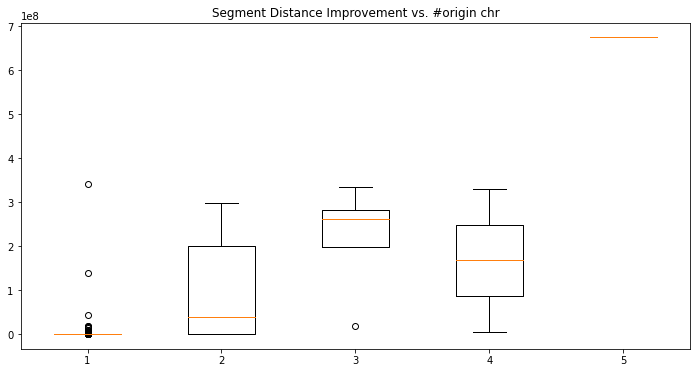

In [21]:
bin1 = df[df['n_origin_chr'] == 1]
bin2 = df[df['n_origin_chr'] == 2]
bin3 = df[df['n_origin_chr'] == 3]
bin4 = df[df['n_origin_chr'] == 4]
bin5 = df[df['n_origin_chr'] == 5]

plt.figure(figsize=(12, 6))
plt.boxplot([bin1['segment_distance_improvement'],
			 bin2['segment_distance_improvement'],
			 bin3['segment_distance_improvement'],
			 bin4['segment_distance_improvement'],
			 bin5['segment_distance_improvement']])
plt.title('Segment Distance Improvement vs. #origin chr')
plt.savefig('figures/improvement_boxplot.png')

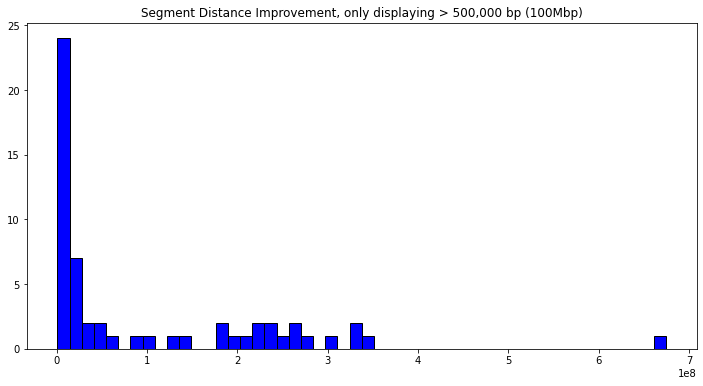

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['segment_distance_improvement'] > 500000]['segment_distance_improvement'], bins=50, color='blue', edgecolor='black')
plt.title('Segment Distance Improvement, only displaying > 500,000 bp (100Mbp)')
plt.savefig('figures/improvement1.png')

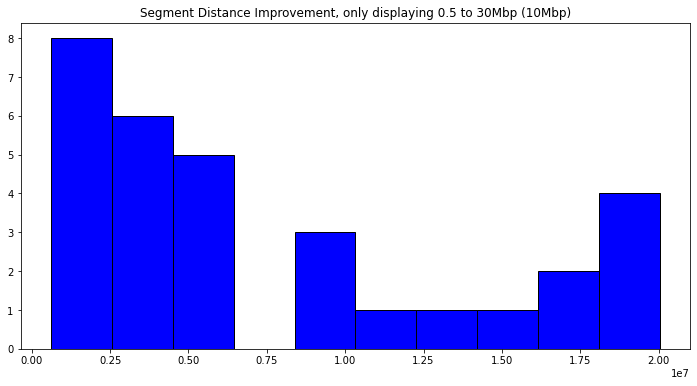

In [23]:
filter1 = df['segment_distance_improvement'] > 500000
filter2 = df['segment_distance_improvement'] < 30000000
plt.figure(figsize=(12, 6))
plt.hist(df[filter1 & filter2]['segment_distance_improvement'], bins=10, color='blue', edgecolor='black')
plt.title('Segment Distance Improvement, only displaying 0.5 to 30Mbp (10Mbp)')
plt.savefig('figures/improvement2.png')

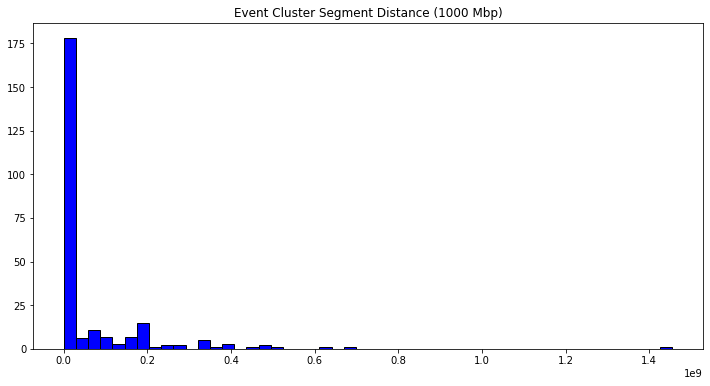

In [24]:
filter1 = df['is_event_cluster']
plt.figure(figsize=(12, 6))
plt.hist(df[filter1]['segment_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Event Cluster Segment Distance (1000 Mbp)')
plt.savefig('figures/event_cluster_distance1.png')

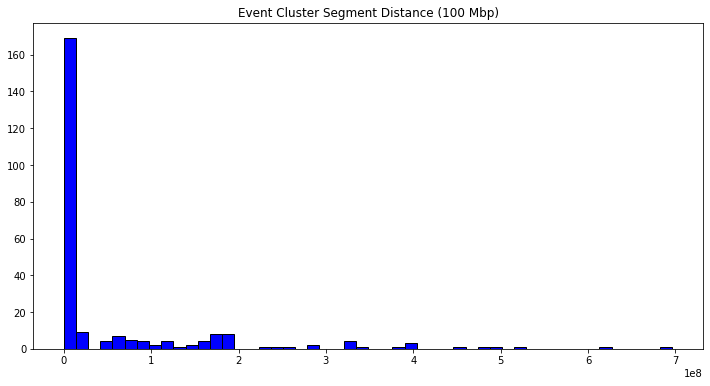

In [25]:
filter1 = (df['is_event_cluster'] == True) & (df['segment_distance'] < 1e9)
plt.figure(figsize=(12, 6))
plt.hist(df[filter1]['segment_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Event Cluster Segment Distance (100 Mbp)')
plt.savefig('figures/event_cluster_distance2.png')

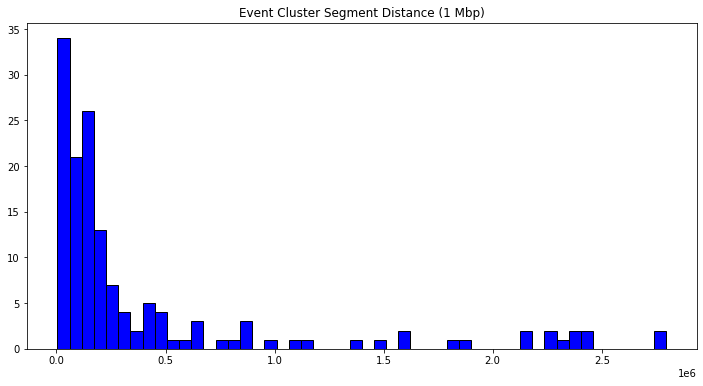

In [26]:
filter1 = (df['is_event_cluster'] == True) & (df['segment_distance'] < 0.3 * 1e7)
plt.figure(figsize=(12, 6))
plt.hist(df[filter1]['segment_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Event Cluster Segment Distance (1 Mbp)')
plt.savefig('figures/event_cluster_distance3.png')

In [27]:
sum((df['is_event_cluster'] == True) & (df['segment_distance'] < 0.5 * 1e6))

116

In [56]:
sum((df['is_event_cluster'] == True) & (df['segment_distance'] < 5 * 1e6))

157

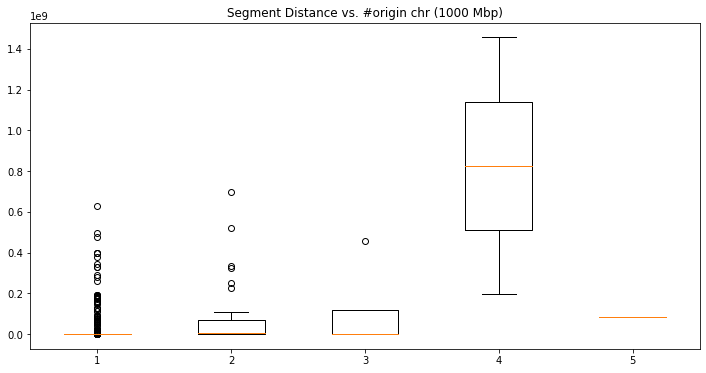

In [28]:
bin1 = df[df['n_origin_chr'] == 1]
bin2 = df[df['n_origin_chr'] == 2]
bin3 = df[df['n_origin_chr'] == 3]
bin4 = df[df['n_origin_chr'] == 4]
bin5 = df[df['n_origin_chr'] == 5]

plt.figure(figsize=(12, 6))
plt.boxplot([bin1['segment_distance'],
			 bin2['segment_distance'],
			 bin3['segment_distance'],
			 bin4['segment_distance'],
			 bin5['segment_distance']])
plt.title('Segment Distance vs. #origin chr (1000 Mbp)')
plt.savefig('figures/event_cluster_distance_boxplot.png')

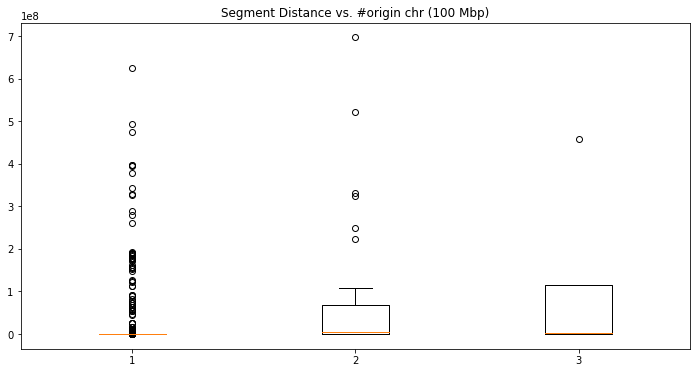

In [29]:
bin1 = df[df['n_origin_chr'] == 1]
bin2 = df[df['n_origin_chr'] == 2]
bin3 = df[df['n_origin_chr'] == 3]

plt.figure(figsize=(12, 6))
plt.boxplot([bin1['segment_distance'],
			 bin2['segment_distance'],
			 bin3['segment_distance']])
plt.title('Segment Distance vs. #origin chr (100 Mbp)')
plt.savefig('figures/event_cluster_distance_boxplot2.png')

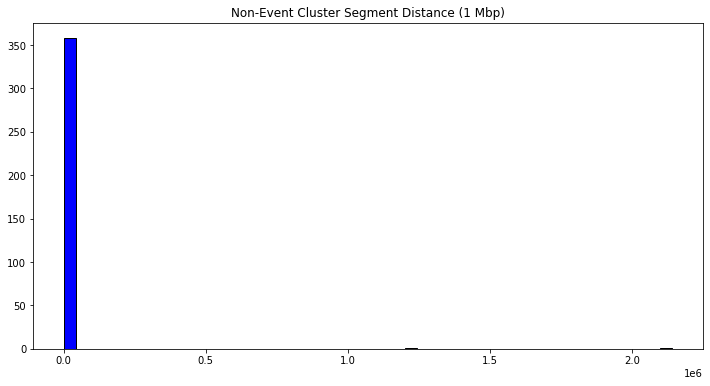

In [30]:
filter1 = df['is_event_cluster'] == False
plt.figure(figsize=(12, 6))
plt.hist(df[filter1]['segment_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Non-Event Cluster Segment Distance (1 Mbp)')
plt.savefig('figures/nonevent_cluster_distance1.png')

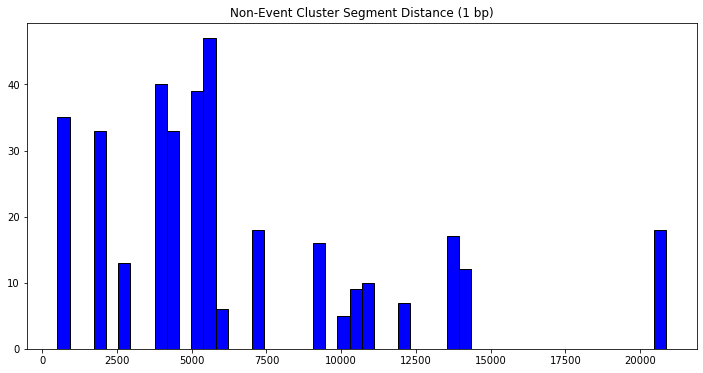

In [31]:
filter1 = (df['is_event_cluster'] == False) & (df['segment_distance'] < 0.5 * 1e6)
plt.figure(figsize=(12, 6))
plt.hist(df[filter1]['segment_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Non-Event Cluster Segment Distance (1 bp)')
plt.savefig('figures/nonevent_cluster_distance2.png')

In [48]:
def iterative_get_missed_transition_edges(df_row):
	file_prefix = '/media/zhaoyang-new/workspace/KarSim/KarComparator/new_data_files/cluster_files/'
	file_suffix = '.txt'
	cluster_file_name = file_prefix + df_row['file_name'] + 'cluster_' + str(df_row['cluster']) + file_suffix
	graph = form_graph_from_cluster(cluster_file_name)
	graph.prune_same_edges()

	missed_transition_edges = graph.get_missed_transition_edges()
	return len(missed_transition_edges[0]), len(missed_transition_edges[1])

In [49]:
df[['karsim_missed_transition', 'omkar_missed_transition']] \
	= df.apply(lambda row: pd.Series(iterative_get_missed_transition_edges(row)), axis=1)

In [50]:
df

,file_name,cluster,n_origin_chr,origin_chr,n_path_karsim,n_path_omkar,total_alignment_cost,alignment_costs,event_chr,is_event_cluster,n_event_chr,segment_distance,segment_distance_improvement,karsim_missed_transition,omkar_missed_transition
0,23X_15q26_overgrowth_r1,0,1,[Chr1],2,2,64203,"[41160, 23043]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1,64203,0,1,3
1,23X_15q26_overgrowth_r1,1,1,[Chr2],2,2,188445274,"[188232388, 212886]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1,188445268,6,1,6
2,23X_15q26_overgrowth_r1,10,1,[Chr11],2,2,22574,"[15518, 7056]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1,22570,4,2,4
3,23X_15q26_overgrowth_r1,11,1,[Chr12],2,2,2696,"[1348, 1348]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",False,0,2696,0,0,0
4,23X_15q26_overgrowth_r1,12,1,[Chr13],2,1,183591686,"[96303080, 87288606]","[Chr1, Chr2, Chr3, Chr5, Chr6, Chr8, Chr11, Ch...",True,1,183591674,12,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,23Y_WAGR_11p13_deletion_r2,5,1,[Chr7],2,2,1976,"[988, 988]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0,1976,0,0,0
604,23Y_WAGR_11p13_deletion_r2,6,1,[Chr8],2,2,5020,"[2510, 2510]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0,5020,0,0,0
605,23Y_WAGR_11p13_deletion_r2,7,1,[Chr9],2,2,504,"[252, 252]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",False,0,504,0,0,0
606,23Y_WAGR_11p13_deletion_r2,8,1,[Chr10],2,2,104410,"[102255, 2155]","[Chr2, Chr3, Chr4, Chr10, Chr11, Chr15, Chr18,...",True,1,21584,82826,10,12


Text(0.5, 1.0, 'Non-Event Cluster Segment Distance (1 bp)')

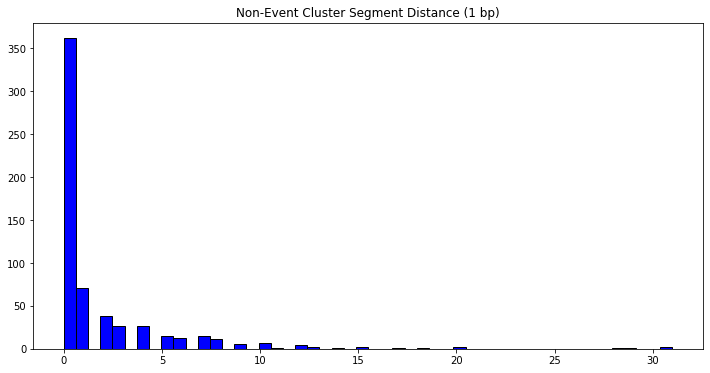

In [51]:
# filter1 = (df['is_event_cluster'] == False) & (df['segment_distance'] < 0.5 * 1e6)
plt.figure(figsize=(12, 6))
plt.hist(df['karsim_missed_transition'], bins=50, color='blue', edgecolor='black')
plt.title('Non-Event Cluster Segment Distance (1 bp)')
# plt.savefig('figures/nonevent_cluster_distance2.png')

Text(0.5, 1.0, 'Non-Event Cluster Segment Distance (1 bp)')

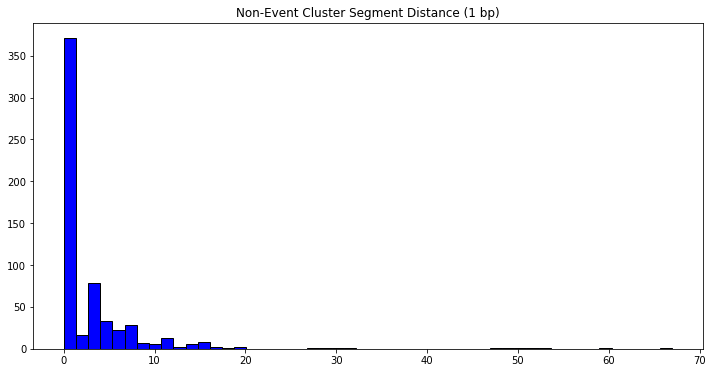

In [53]:
# filter1 = (df['is_event_cluster'] == False) & (df['segment_distance'] < 0.5 * 1e6)
plt.figure(figsize=(12, 6))
plt.hist(df['omkar_missed_transition'], bins=50, color='blue', edgecolor='black')
plt.title('Non-Event Cluster Segment Distance (1 bp)')
# plt.savefig('figures/nonevent_cluster_distance2.png')

In [55]:
df.to_csv('comparison_statistics.csv', index=False)